In [18]:
import sys
import os

project_root = os.path.abspath('..')
if project_root not in sys.path:
    sys.path.append(project_root)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from src.visualization import visualization
from obtener_resumenes import leer_y_formatear_pesos_amaz_fit

sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = (12, 6)

METRICAS_RELEVANTES = ["weight", "fatRate", "muscleRate"]
COLORES = ["#30343F", "#89023E", "#EA638C"]

In [20]:
df = leer_y_formatear_pesos_amaz_fit()

In [26]:
FECHA_INICIAL = pd.to_datetime("01-11-2023", dayfirst=True)
FECHA_FINAL = pd.to_datetime("30-11-2023", dayfirst=True)

df_fecha = df[(df.time >= FECHA_INICIAL) & (df.time <= FECHA_FINAL)]

In [27]:
promedios_por_semana = df_fecha.groupby("week")[METRICAS_RELEVANTES].mean()
promedios_por_semana.columns = promedios_por_semana.columns + "_promedios"

pesos_con_promedios = df_fecha.merge(
    promedios_por_semana, how="inner", left_on="week", right_index=True
).set_index("time")

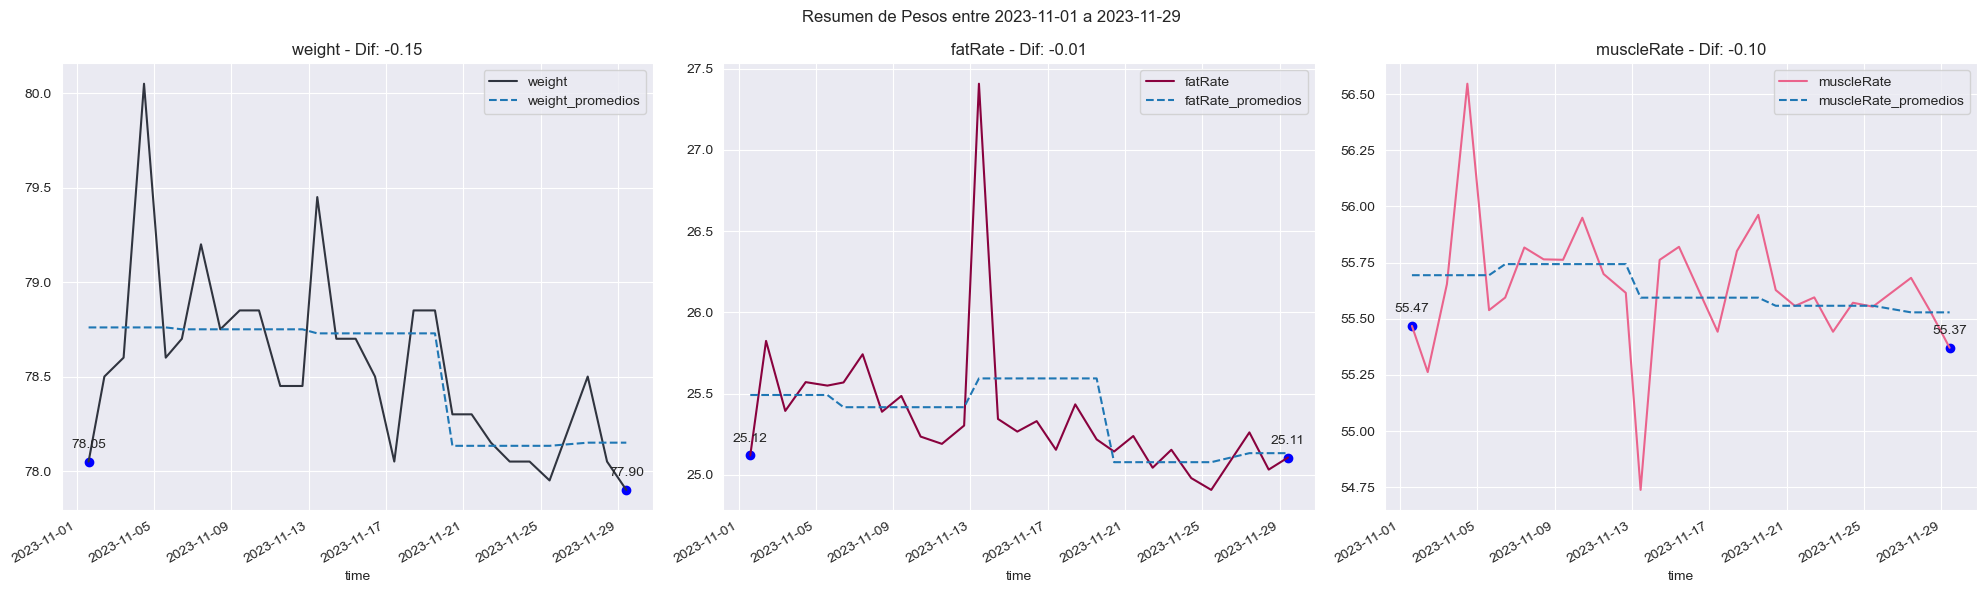

> El resumen de las metricas entre la ultima y primera semana del mes fueron:

|                      |      44 |      48 |   Diferencia |
|:---------------------|--------:|--------:|-------------:|
| weight_promedios     | 78.76   | 78.15   |    -0.61     |
| fatRate_promedios    | 25.4919 | 25.1339 |    -0.35801  |
| muscleRate_promedios | 55.6941 | 55.5287 |    -0.165354 |


In [28]:
figura = visualization.crear_graficos_pesos(pesos_con_promedios, METRICAS_RELEVANTES, COLORES)
resumen = visualization.obtener_resumen_mes_por_semana(promedios_por_semana)
print(f"> El resumen de las metricas entre la ultima y primera semana del mes fueron:\n\n"
      f"{resumen.to_markdown()}")

In [29]:
figura.savefig("reporte.pdf")